In [15]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weight = None
        self.bias = None

    def fit(self, x, y):
        # init parameters
        n_samples, n_features = x.shape
        self.weight = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            y_predicted = np.dot(x, self.weight) + self.bias

            dw = (1 / n_samples) * np.dot(x.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weight -= self.lr * dw
            self.bias -= self.lr * db

        return self

    def predict(self, x):
        return np.dot(x, self.weight) + self.bias


In [23]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

def mean_squared_error(y_true, y_predicted):
    return np.mean((y_true - y_predicted) ** 2)

def r2_score(y_true, y_predicted):
    corr_matrix = np.corrcoef(y_true, y_predicted)
    corr = corr_matrix[0, 1]
    return corr ** 2

x, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

regressor = LinearRegression(lr=0.01, n_iter=1000)
regressor = regressor.fit(x_train, y_train)

# INFERENCE
predictions = regressor.predict(x_test)

# ERROR
mse = mean_squared_error(y_test, predictions)
print("MSE", mse)

accu = r2_score(y_test, predictions)
print("Accuracy", accu)



MSE 325.7197246718065
Accuracy 0.9291693410698006


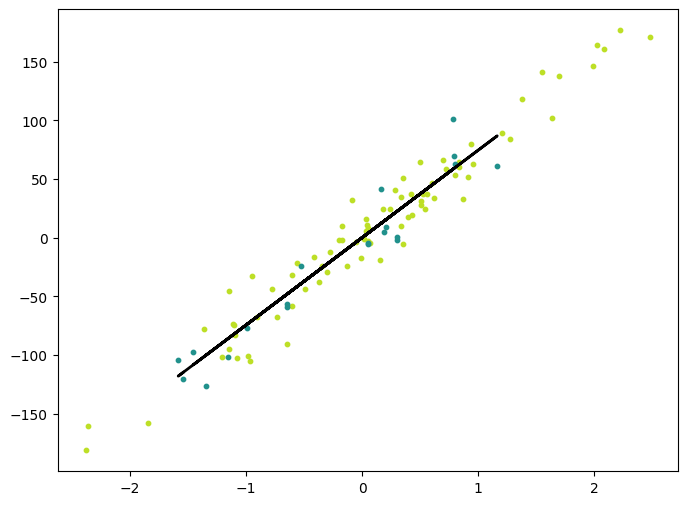

In [25]:
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))

m1 = plt.scatter(x_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(x_test, y_test, color=cmap(0.5), s=10)

plt.plot(x_test, predictions, color="black", linewidth=2, label="predictor")
